In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import datetime as dt

### Making Figures

Author: Ekaterina M. D. Lezine

---

Making comparison plots of predicted/observed discharge for the holdout years for all of the models:

Needed to redo Sarah's code to save her outputs for the holdout set so I could plot them (repeated this code below for each station):

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Import train and test splits 
# Holdout year will be used for final testing once models are done
# Train
hanbury_train = pd.read_csv("hanbury_train.csv")
hanbury_train['day_of_year'] = [dt.datetime.strptime(i, '%Y-%m-%d').timetuple().tm_yday for i in hanbury_train.datetime]
# Test
hanbury_val = pd.read_csv("hanbury_valid.csv")
hanbury_val['day_of_year'] = [dt.datetime.strptime(i, '%Y-%m-%d').timetuple().tm_yday for i in hanbury_val.datetime]

hanbury_test = pd.read_csv("hanbury_test.csv")
hanbury_test['day_of_year'] = [dt.datetime.strptime(i, '%Y-%m-%d').timetuple().tm_yday for i in hanbury_test.datetime]
#Holdout 
hanbury_holdout = pd.read_csv("hanbury_holdout.csv")
hanbury_holdout['day_of_year'] = [dt.datetime.strptime(i, '%Y-%m-%d').timetuple().tm_yday for i in hanbury_holdout.datetime]

# Remove (mostly) empty columns
hanbury_train = hanbury_train.drop(['datetime','station','st_total_rain','st_total_snow','st_total_precip','st_total_snow_on_ground','st_dir_of_max_gust_10sdeg','st_spd_of_max_gust_kmh'],axis=1)
hanbury_train = hanbury_train.dropna()
hanbury_val = hanbury_val.drop(['datetime','station','st_total_rain','st_total_snow','st_total_precip','st_total_snow_on_ground','st_dir_of_max_gust_10sdeg','st_spd_of_max_gust_kmh'],axis=1)
hanbury_val = hanbury_val.dropna()
hanbury_test = hanbury_test.drop(['datetime','station','st_total_rain','st_total_snow','st_total_precip','st_total_snow_on_ground','st_dir_of_max_gust_10sdeg','st_spd_of_max_gust_kmh'],axis=1)
hanbury_test = hanbury_test.dropna()
hanbury_holdout = hanbury_holdout.drop(['datetime','station','st_total_rain','st_total_snow','st_total_precip','st_total_snow_on_ground','st_dir_of_max_gust_10sdeg','st_spd_of_max_gust_kmh'],axis=1)
hanbury_holdout = hanbury_holdout.dropna()

#### ***NOTE: X and y assigned backwards! Run correctly but should probably be fixed***

# Split into met and ERA-5 datasets
hanbury_train_met = hanbury_train[['day_of_year', 'st_max_temp', 'st_min_temp', 'st_mean_temp', 'st_heat_deg_days', 'st_cool_deg_days']]
hanbury_train_era = hanbury_train[['day_of_year',  'era5_noon_t2m', 'era5_noon_evavt', 'era5_noon_ro', 'era5_noon_sd', 'era5_noon_es', 'era5_noon_sf', 'era5_noon_smlt', 'era5_noon_stl1', 'era5_noon_ssr', 'era5_noon_e', 'era5_noon_tp']]
hanbury_val_met = hanbury_val[['day_of_year',  'st_max_temp', 'st_min_temp', 'st_mean_temp', 'st_heat_deg_days', 'st_cool_deg_days']]
hanbury_val_era = hanbury_val[['day_of_year',  'era5_noon_t2m', 'era5_noon_evavt', 'era5_noon_ro', 'era5_noon_sd', 'era5_noon_es', 'era5_noon_sf', 'era5_noon_smlt', 'era5_noon_stl1', 'era5_noon_ssr', 'era5_noon_e', 'era5_noon_tp']]
hanbury_test_met = hanbury_test[['day_of_year',  'st_max_temp', 'st_min_temp', 'st_mean_temp', 'st_heat_deg_days', 'st_cool_deg_days']]
hanbury_test_era = hanbury_test[['day_of_year',  'era5_noon_t2m', 'era5_noon_evavt', 'era5_noon_ro', 'era5_noon_sd', 'era5_noon_es', 'era5_noon_sf', 'era5_noon_smlt', 'era5_noon_stl1', 'era5_noon_ssr', 'era5_noon_e', 'era5_noon_tp']]
hanbury_holdout_met = hanbury_holdout[['day_of_year',  'st_max_temp', 'st_min_temp', 'st_mean_temp', 'st_heat_deg_days', 'st_cool_deg_days']]
hanbury_holdout_era = hanbury_holdout[['day_of_year',  'era5_noon_t2m', 'era5_noon_evavt', 'era5_noon_ro', 'era5_noon_sd', 'era5_noon_es', 'era5_noon_sf', 'era5_noon_smlt', 'era5_noon_stl1', 'era5_noon_ssr', 'era5_noon_e', 'era5_noon_tp']]


# Split into X and y
hanbury_train_X = hanbury_train['flow']
hanbury_train_X = np.expand_dims(hanbury_train_X, axis=1)
hanbury_val_X = hanbury_val['flow']
hanbury_val_X = np.expand_dims(hanbury_val_X, axis=1)
hanbury_test_X = hanbury_test['flow']
hanbury_test_X = np.expand_dims(hanbury_test_X, axis=1)
hanbury_holdout_X = hanbury_holdout['flow']
hanbury_holdout_X = np.expand_dims(hanbury_holdout_X, axis=1)

'''
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
nfolds = 5
depths = np.arange(1,21,1)
val_scores = np.zeros((depths.shape[0], nfolds))
for i, d in enumerate(depths):
  tree = DecisionTreeRegressor(max_depth=d, random_state=12)
  val_scores[i,:] = cross_val_score(tree, hanbury_train_X, hanbury_train_y, cv=nfolds, scoring='r2')
plt.figure(figsize=(12,6))
plt.plot(depths, val_scores, color='k', alpha=0.2)
plt.plot(depths, np.mean(val_scores,axis=1), color='blue')
plt.title('selecting max_depth parameter with 5-fold CV')
plt.xlabel('max_depth')
plt.ylabel('validation r-squared')
plt.xticks(depths)
plt.show()
print(np.round(np.mean(val_scores,axis=1),4))
'''


# Random Forest regression on training data
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

variables = hanbury_train.columns.tolist()
print(variables)

'''
# Investigate depth selection: First 1,51,5 then within peak section of this
for depth in range(20,31,1):
  rf = RandomForestRegressor(random_state=12, max_depth=depth, max_features=0.5, oob_score=True)
  rf.fit(hanbury_train_met,hanbury_train_X)
  val_score = rf.oob_score_
  print('Met Data Random Forest (50%) validation r2 score for depth', depth,': ', np.round(rf.oob_score_,4))
for depth in range(6,16,1):
  rf = RandomForestRegressor(random_state=12, max_depth=depth, max_features=0.5, oob_score=True)
  rf.fit(hanbury_train_era,hanbury_train_X)
  val_score = rf.oob_score_
  print('ERA-5 Data Random Forest (50%) validation r2 score for depth', depth,': ', np.round(rf.oob_score_,4))
'''
# Select depths from rf validations to build models
met_depth = 12
era_depth = 13
# Met model
rf_met = RandomForestRegressor(random_state=12, max_depth=met_depth, max_features=0.5, oob_score=True)
rf_met.fit(hanbury_train_met,hanbury_train_X)
val_score = rf_met.oob_score_
print('Final Met Data Random Forest (50%) validation r2 score for depth', met_depth,': ', np.round(rf_met.oob_score_,4))
# ERA-5 model
rf_era = RandomForestRegressor(random_state=12, max_depth=era_depth, max_features=0.5, oob_score=True)
rf_era.fit(hanbury_train_era,hanbury_train_X)
val_score = rf_era.oob_score_
print('Final ERA-5 Data Random Forest (50%) validation r2 score for depth', era_depth,': ', np.round(rf_era.oob_score_,4))

# Estimate new validation data
# Met 
rf_met = RandomForestRegressor(random_state=12, max_depth=met_depth, max_features=0.5, oob_score=True)
rf_met.fit(hanbury_train_met,hanbury_train_X)

rf_met_val_score = rf_met.oob_score_
print('Met Data Random forest validation accuracy:', np.round(rf_met_val_score,4))

rf_met_test_pred = rf_met.predict(hanbury_test_met)
# ERA-5
rf_era = RandomForestRegressor(random_state=12, max_depth=era_depth, max_features=0.5, oob_score=True)
rf_era.fit(hanbury_train_era,hanbury_train_X)

rf_era_val_score = rf_era.oob_score_
print('ERA-5 Data Random forest validation accuracy:', np.round(rf_era_val_score,4))

rf_era_test_pred = rf_era.predict(hanbury_test_era)

'''
# Plot
in1=plt.plot(hanbury_val['date'],rf_met_val_pred)
in2=plt.plot(hanbury_val['date'],rf_era_val_pred)
in3=plt.plot(hanbury_val['date'],hanbury_val_X)
plt.ylabel('Discharge (m3/s)')
plt.legend([in3], ['Met','ERA-5','Measured'])
plt.legend()
plt.show()
'''

# Performance Evaluation
# R2
from sklearn.metrics import r2_score

r2_met = r2_score(hanbury_test_X, rf_met_test_pred)
r2_era = r2_score(hanbury_test_X, rf_era_test_pred)
print('R2 Met:', r2_met)
print('R2 ERA-5:', r2_era)

# RMSE, MAE, NSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rmse_met = mean_squared_error(hanbury_test_X, rf_met_test_pred, squared=False)
rmse_era = mean_squared_error(hanbury_test_X, rf_era_test_pred, squared=False)
mae_met = mean_absolute_error(hanbury_test_X, rf_met_test_pred)
mae_era = mean_absolute_error(hanbury_test_X, rf_era_test_pred)

denom = np.sum((hanbury_test_X - np.mean(hanbury_test_X)) ** 2)
num_met = np.sum((rf_met_test_pred - hanbury_test_X) ** 2)
num_era = np.sum((rf_era_test_pred - hanbury_test_X) ** 2)
nse_met = 1 - num_met/denom
nse_era = 1 - num_era/denom
nnse_met = 1/(2-nse_met)
nnse_era = 1/(2-nse_era)

print("RMSE Met:", rmse_met)
print("RMSE ERA-5:",rmse_era)
print("MAE Met:", mae_met)
print("MAE ERA-5:", mae_era)
print("NSE Met:", nse_met)
print("NSE ERA-5:", nse_era)
print("NNSE Met:", nnse_met)
print("NNSE ERA-5:", nnse_era)

['date', 'flow', 'st_max_temp', 'st_min_temp', 'st_mean_temp', 'st_heat_deg_days', 'st_cool_deg_days', 'era5_noon_t2m', 'era5_noon_evavt', 'era5_noon_ro', 'era5_noon_sd', 'era5_noon_es', 'era5_noon_sf', 'era5_noon_smlt', 'era5_noon_stl1', 'era5_noon_ssr', 'era5_noon_e', 'era5_noon_tp', 'day_of_year']


<ipython-input-42-dbd5319d9fb7>:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_met.fit(hanbury_train_met,hanbury_train_X)


Final Met Data Random Forest (50%) validation r2 score for depth 12 :  0.8125


<ipython-input-42-dbd5319d9fb7>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_era.fit(hanbury_train_era,hanbury_train_X)


Final ERA-5 Data Random Forest (50%) validation r2 score for depth 13 :  0.93


<ipython-input-42-dbd5319d9fb7>:113: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_met.fit(hanbury_train_met,hanbury_train_X)


Met Data Random forest validation accuracy: 0.8125


<ipython-input-42-dbd5319d9fb7>:121: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_era.fit(hanbury_train_era,hanbury_train_X)


ERA-5 Data Random forest validation accuracy: 0.93
R2 Met: 0.39552331287590037
R2 ERA-5: 0.8243073785861338
RMSE Met: 11.129166621511132
RMSE ERA-5: 5.999977584488059
MAE Met: 8.797696347774545
MAE ERA-5: 3.7514833320858014
NSE Met: -162.16483462165067
NSE ERA-5: -152.26911305558406
NNSE Met: 0.006091438536789512
NNSE ERA-5: 0.0064821789676050975


In [43]:
rf_era = RandomForestRegressor(random_state=12, max_depth=era_depth, max_features=0.5, oob_score=True)
rf_era.fit(hanbury_val_era,hanbury_val_X)
era = rf_era.predict(hanbury_holdout_era)

rf_met = RandomForestRegressor(random_state=12, max_depth=met_depth, max_features=0.5, oob_score=True)
rf_met.fit(hanbury_val_met,hanbury_val_X)
met = rf_met.predict(hanbury_holdout_met)

<ipython-input-43-2296120c58ce>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_era.fit(hanbury_val_era,hanbury_val_X)
<ipython-input-43-2296120c58ce>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_met.fit(hanbury_val_met,hanbury_val_X)


In [45]:
np.save('hanbury_weather_RF_holdout.npy',met)

Then doing the plotting:

In [77]:
station = 'snare'

In [78]:
lstm = np.load(station + '_lstm_holdout.npy')
mlp = np.load(station + '_mlp_holdout.npy')
rf_weather = np.load(station + '_weather_RF_holdout.npy')
rf_era = np.load(station + '_ERA5_RF_holdout.npy')
actual = pd.read_csv(station + '_holdout.csv')

In [79]:
flow = actual.flow

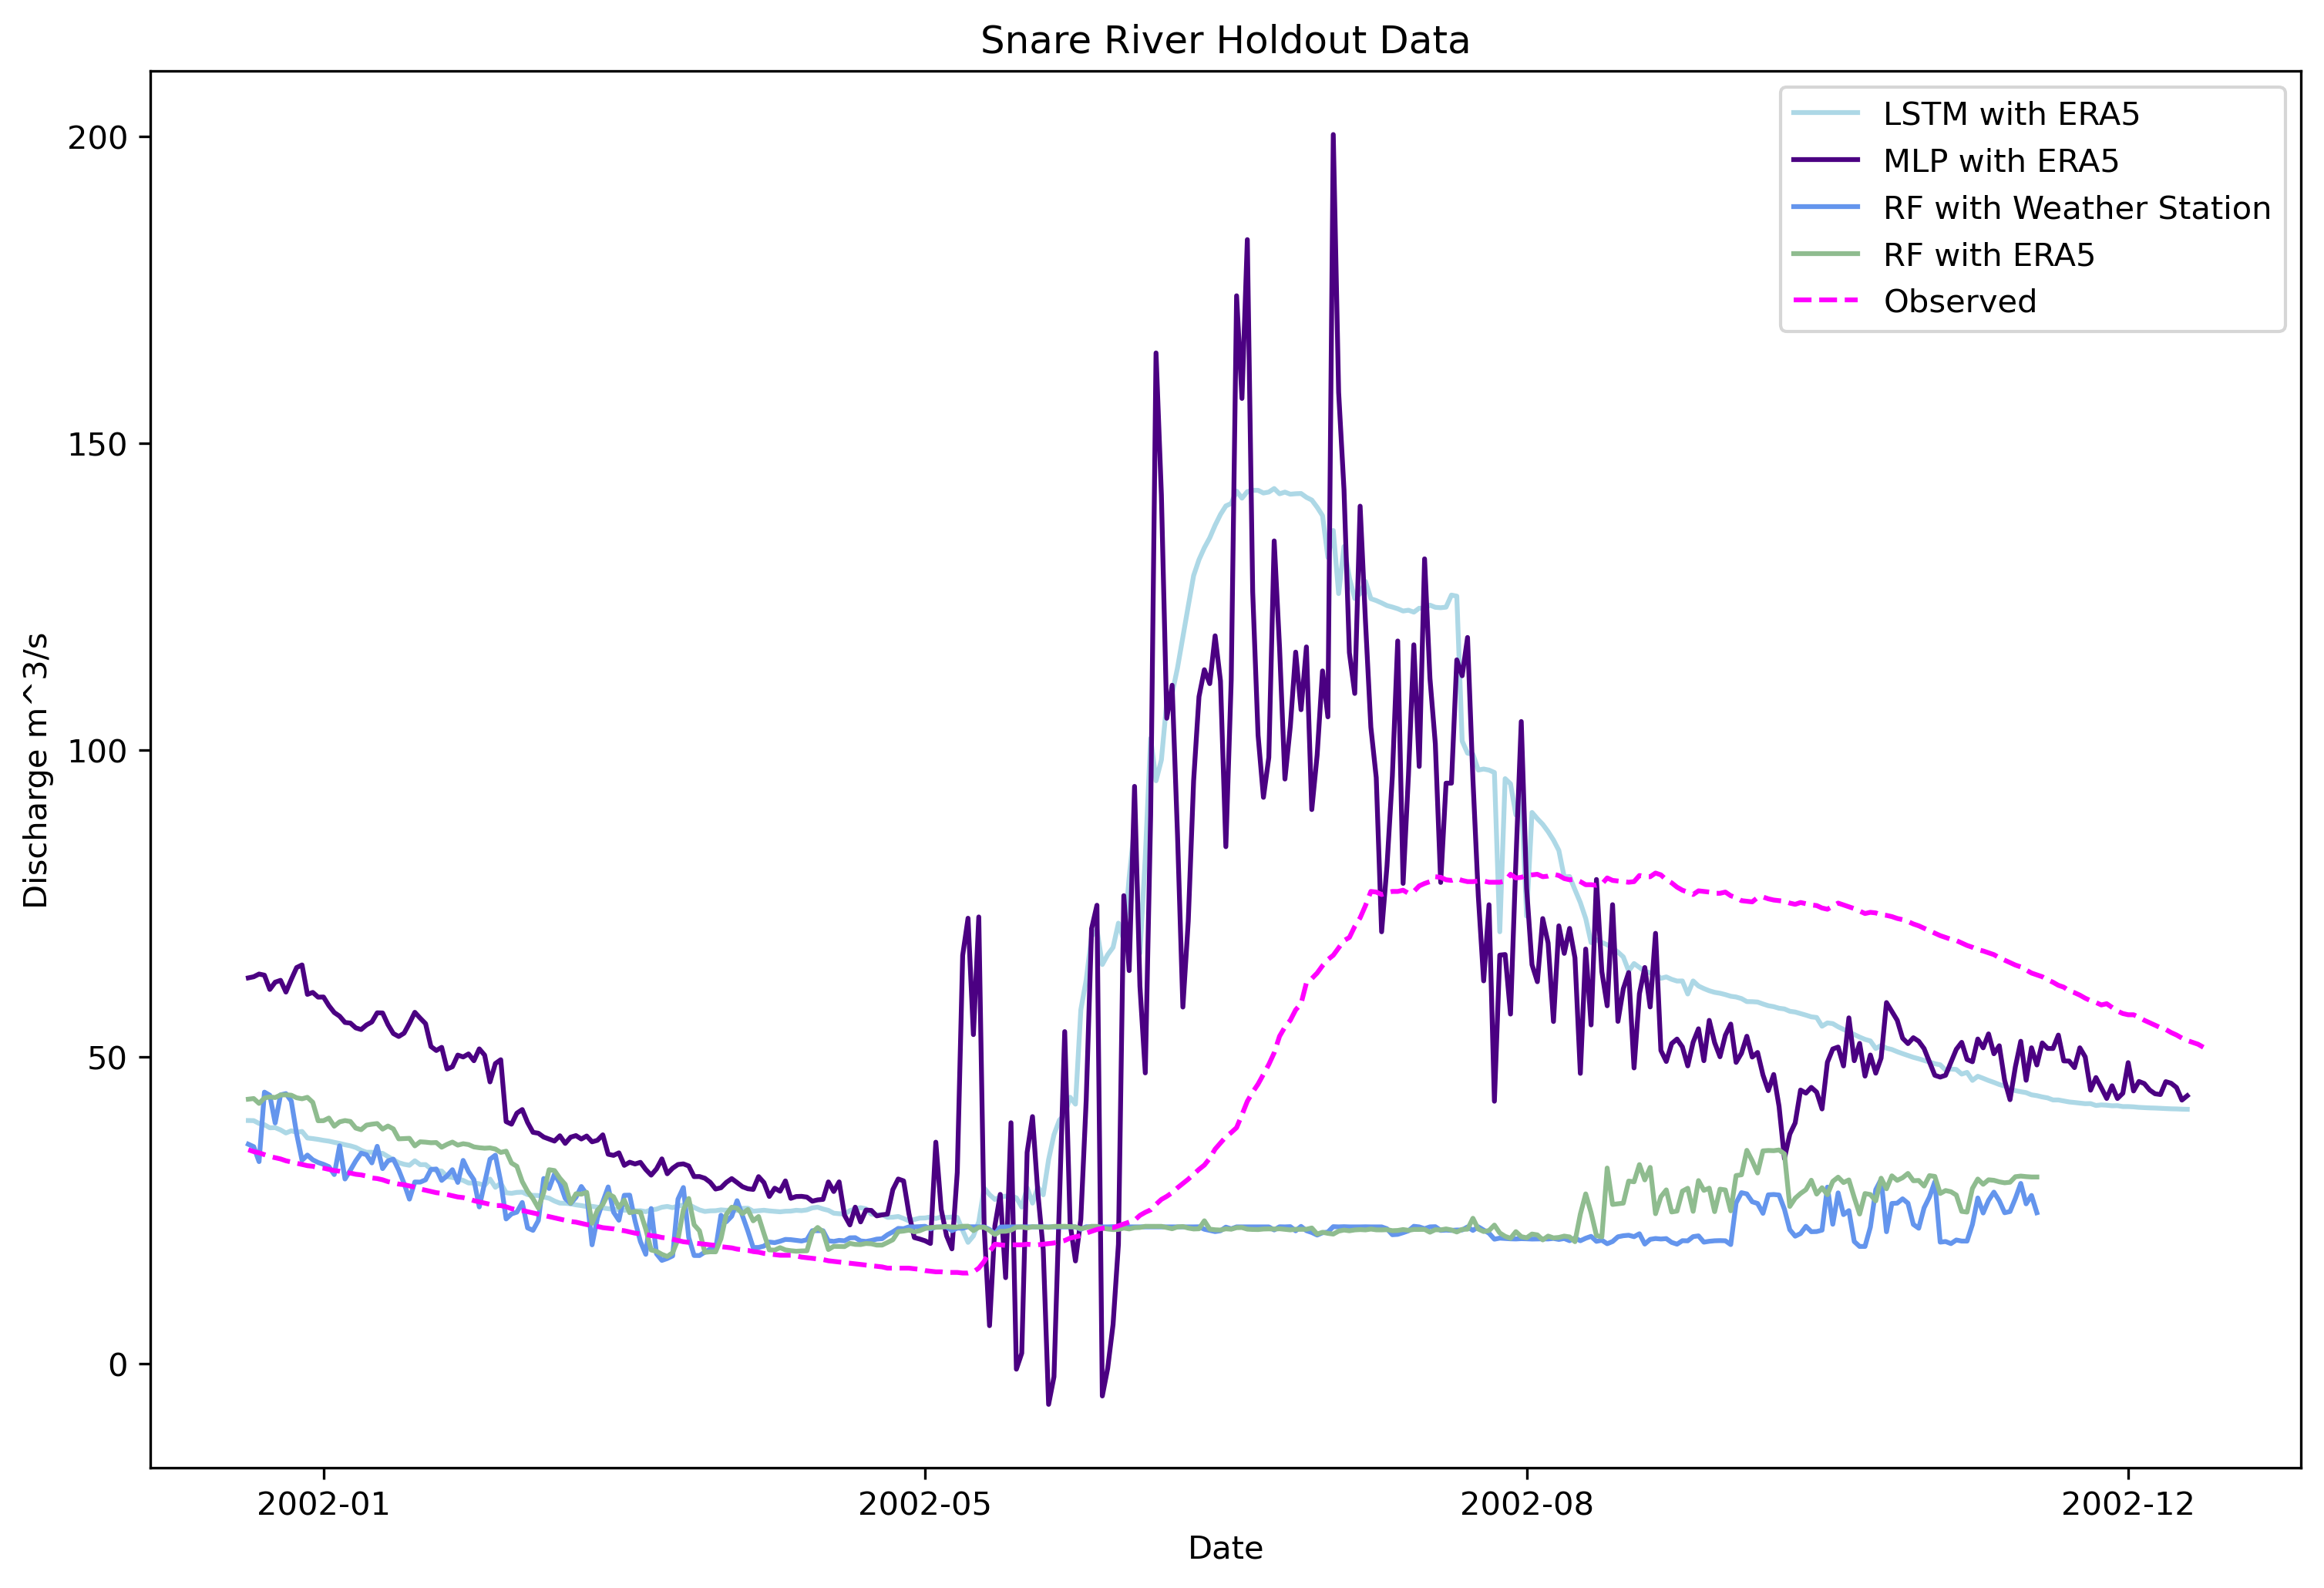

In [80]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = pd.to_datetime(actual.datetime)

fig, ax = plt.subplots(figsize=(12, 8))

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge m^3/s",
       title="Snare River Holdout Data")

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=16))

ax.plot(dates[0:len(lstm)], lstm, color = 'lightblue', label = 'LSTM with ERA5')
ax.plot(dates[0:len(mlp)], mlp, color = 'indigo', label = 'MLP with ERA5')
ax.plot(dates[0:len(rf_weather)], rf_weather, color = 'cornflowerblue', label = 'RF with Weather Station')
ax.plot(dates[0:len(rf_era)], rf_era, color = 'darkseagreen', label = 'RF with ERA5')
ax.plot(dates[0:len(flow)], flow, color = 'magenta', ls = '--', label = 'Observed')
plt.legend()

---

Making a miscellaneous (sp?) figure showing ERA5:

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
plt.rcParams['figure.dpi'] = 300

In [ ]:
era5 = xr.open_dataset(r'data/weather/era5/adaptor.mars.internal-1617593289.4103088-30324-16-c253e4af-b228-4d4c-a3e0-ee078ce7bc66.nc').t2m

In [ ]:
p = era5.isel(time=5000).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
p.axes.set_global()

p.axes.coastlines()

In [ ]:
ax = plt.subplot(projection=ccrs.PlateCarree())

p = era5.isel(time=5000).plot(ax=ax)

ax.scatter(-114.38,62.45, color='red', s=0.25)
ax.annotate('45467', (-114.38,62.45), size=5)

ax.scatter(-115.02, 64.39, color='red', s=0.25)
ax.annotate('10757', (-115.02, 64.39), size=5)

ax.scatter(-105.13, 63.60, color='red', s=0.25)
ax.annotate('10897', (-105.13, 63.60), size=5)

ax.scatter(-115.78, 60.84, color='red', s=0.25)
ax.annotate('1664', (-115.78, 60.84), size=5)

---

Making a comparison between ERA5 precip and weather station data:

In [ ]:
hanbury_train = pd.read_csv('hay_train.csv')

In [ ]:
st_t_mean = hanbury_train.st_mean_temp
st_t_max = hanbury_train.st_max_temp
st_t_min = hanbury_train.st_min_temp
st_p = hanbury_train.st_total_precip

era_t = hanbury_train.era5_noon_t2m-273.15
era_p = hanbury_train.era5_noon_tp*1000

dates = pd.to_datetime(hanbury_train.datetime)

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total Precipitation (mm)",
       title="Precipitation for Station Hay River (1664)")

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))

ax.plot(dates[:365],st_p[:365], lw =1, label = 'In-Situ Daily Total Precip', c = 'black')
ax.plot(dates[:365],era_p[:365], lw= 1, label = 'Interpolated ERA5 Daily Precip', c='green')
plt.legend()

errors = []
for st,era in zip(st_p[:365],era_p[:365]):
    errors.append(era - st)
error = np.nanmean(errors)
stddev = np.nanstd(errors)
print(error)
print(stddev)

ax.text(dates[290],14.5,' On average, the interpolated ERA5 \n precip is ' + str(error.round(2)) + ' Â± ' + str(stddev.round(2)) + ' mm \n from the recorded in-situ total precip', fontsize=10)